In [1]:
import sys
import os
from os.path import join
from os import listdir as ld
sys.path.append(join('/',*os.getcwd().split('/')[:-1], 'lib'))

import json
import os
import pandas as pd
#from genData import load_model
import re
import numpy as np
import pickle

from importlib import reload
import mainlib
reload(mainlib)
import A_base as ab
reload(ab)
from  mainlib import fasorial, lista, sdict, mm, mm_sep


import collections
import of_proc
reload(of_proc)
from of_proc import *

%matplotlib inline
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
def dk(d,k=0):
    return list(d.values())[k]

In [3]:
from mainlib import dframe
data= dframe().data

In [4]:
FAS = '/home/ubuntu/data/data/maio_2019/setembro/fas.csv'

In [5]:
OFAS =  '/home/ubuntu/data/data/maio_2019/setembro/fas_sep/'

In [6]:
MM =   '/home/ubuntu/data/data/maio_2019/setembro/mm/csv/'

l__________________________________________________________________________________________________________________________________________________

In [7]:
from mainlib import base, dframe

In [8]:
data = base().data

In [9]:
dp = dframe().dateparser

In [10]:
fascols = data['fasorial']['columns']

In [11]:
td = data['fasorial']['todrop']

l__________________________________________________________________________________________________________________________________________________

#### Database

In [13]:
import pymongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]

In [14]:
PATH= '/home/ubuntu/data/data/maio_2019/setembro/fas-sep/'

In [28]:
f = pd.read_csv(join(PATH,ld(PATH)[0]),sep=';',names = fascols, parse_dates = [5], date_parser = dp, index_col=[5],decimal=',')

In [29]:
f.drop(columns = td, inplace=True)

In [32]:
for k,v in f.dtypes.items():
    if v == 'object' and k != 'ponto_medicao':
        f[k] = f[k].apply(point2comma)
        print(k,v) 

In [33]:
f.head()

,ponto_medicao,serial,IA,IB,IC,AIA,AIB,AIC,VA,VB,...,VAC,AVAB,AVBC,AVAC,PA,PB,PC,FPA,FPB,FPC
data,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:08,BTI400024830,8027241,0.07,0.0,0.0,308,120,241,127,128,...,219,0,0,0,5,0,0,61,100,100
2019-04-01 00:00:08,BTI400024830,8027241,0.07,0.0,0.0,308,120,241,127,128,...,219,0,0,0,5,0,0,61,100,100
2019-04-01 00:00:08,BTI400024830,8027241,0.07,0.0,0.0,308,120,241,127,128,...,219,0,0,0,5,0,0,61,100,100
2019-04-01 00:00:08,BTI400024830,8027241,0.07,0.0,0.0,308,120,241,127,128,...,219,0,0,0,5,0,0,61,100,100
2019-04-01 00:00:08,BTI400024830,8027241,0.07,0.0,0.0,308,120,241,127,128,...,219,0,0,0,5,0,0,61,100,100


In [34]:
a=f.to_dict()

In [35]:
a['ponto_medicao'] = dk(a['ponto_medicao'])

In [37]:
a['serial'] = dk(a['serial'])

In [38]:
a

{'ponto_medicao': 'BTI400024830',
 'serial': 8027241,
 'IA': {Timestamp('2019-04-01 00:00:08'): 0.07,
  Timestamp('2019-04-01 00:15:04'): 0.12,
  Timestamp('2019-04-01 00:30:04'): 0.08,
  Timestamp('2019-04-01 00:45:03'): 0.1,
  Timestamp('2019-04-01 01:00:04'): 0.12,
  Timestamp('2019-04-01 01:15:02'): 0.12,
  Timestamp('2019-04-01 01:30:04'): 0.14,
  Timestamp('2019-04-01 01:45:05'): 0.08,
  Timestamp('2019-04-01 02:00:06'): 0.08,
  Timestamp('2019-04-01 02:15:12'): 0.07,
  Timestamp('2019-04-01 02:30:04'): 0.08,
  Timestamp('2019-04-01 02:45:07'): 0.08,
  Timestamp('2019-04-01 03:00:05'): 0.07,
  Timestamp('2019-04-01 03:15:05'): 0.08,
  Timestamp('2019-04-01 03:30:05'): 0.1,
  Timestamp('2019-04-01 03:45:03'): 0.08,
  Timestamp('2019-04-01 04:00:11'): 0.1,
  Timestamp('2019-04-01 04:15:03'): 0.1,
  Timestamp('2019-04-01 04:30:03'): 0.07,
  Timestamp('2019-04-01 04:45:04'): 0.07,
  Timestamp('2019-04-01 05:00:03'): 0.08,
  Timestamp('2019-04-01 05:15:03'): 0.08,
  Timestamp('2019-04

In [21]:
col0 = mydb['fasoriais']

In [22]:
col0.insert_one({'a':1})

In [39]:
q = {'a':1}

In [42]:
el0 = mydb['fasoriais'].find(q)

In [46]:
el0 = col0.delete_one(q)

In [48]:
ex0 = mydb['fasoriais'].find_one()

In [25]:
a

{'ponto_medicao': nan,
 'serial': {Timestamp('2019-04-01 00:00:08'): 8027241,
  Timestamp('2019-04-01 00:15:04'): 8027241,
  Timestamp('2019-04-01 00:30:04'): 8027241,
  Timestamp('2019-04-01 00:45:03'): 8027241,
  Timestamp('2019-04-01 01:00:04'): 8027241,
  Timestamp('2019-04-01 01:15:02'): 8027241,
  Timestamp('2019-04-01 01:30:04'): 8027241,
  Timestamp('2019-04-01 01:45:05'): 8027241,
  Timestamp('2019-04-01 02:00:06'): 8027241,
  Timestamp('2019-04-01 02:15:12'): 8027241,
  Timestamp('2019-04-01 02:30:04'): 8027241,
  Timestamp('2019-04-01 02:45:07'): 8027241,
  Timestamp('2019-04-01 03:00:05'): 8027241,
  Timestamp('2019-04-01 03:15:05'): 8027241,
  Timestamp('2019-04-01 03:30:05'): 8027241,
  Timestamp('2019-04-01 03:45:03'): 8027241,
  Timestamp('2019-04-01 04:00:11'): 8027241,
  Timestamp('2019-04-01 04:15:03'): 8027241,
  Timestamp('2019-04-01 04:30:03'): 8027241,
  Timestamp('2019-04-01 04:45:04'): 8027241,
  Timestamp('2019-04-01 05:00:03'): 8027241,
  Timestamp('2019-04-0

l__________________________________________________________________________________________________________________________________________________

### Fasorial

In [10]:
fas = pd.read_csv(FAS,sep=';')

KeyboardInterrupt: 

In [ ]:
%%time
f = open(FAS,'rt')
f.readline()
line = f.readline()
f1 = line.split(';')[0]
print(f1)
out_file = os.path.join(OFAS,f1+'.csv')
of = open(out_file,'wt')
n0, n1, n2 = 0,0,0
while line != '':
    n1+=1
    line = f.readline()
    #print(n1,end='\r')
    if len(line) >1:       
        f2 = line.split(';')[0]
        if f2 == f1:
            of.write(line)
        else:
            n2+=1
            print('Escrito arquivo: {}-->  {}. Possui {} registros. Linha {}'.format(n2,f1,n1-n0,n1))
            n0=n1
            of.close()
            f1 = f2
            out_file = os.path.join(OFAS,f1+'.csv')
            of = open(out_file,'wt')
print('Concluído')

    

In [ ]:
%%time
n=0
with open(FAS,'rt') as f:
    f.readline()
    pm0 = f.readline().split(';')[0]
    #print(pm0)
    li=[pm0]
    while True:
        n+=1
        l=f.readline()
        if l =='':
            print(n)
            break
        if len(l)>1:
            pm = l.split(';')[0]
        if n%10000==0:
            print(n,end=' ')
        if pm != pm0:
            li.append(pm)
            pm0=pm            

In [ ]:
sli = set(li)

In [ ]:
len(sli)

In [ ]:
# partir de uma linha sem ler arquivo inteiro
# from stackoverflow

from itertools import islice
line_number = 67430441

with open(FAS,'rt') as f:
    # Adjust index since Python/islice indexes from 0 and the first 
    # line of a file is line 1
    line = next(islice(f, line_number - 1, line_number))

l__________________________________________________________________________________________________________________________________________________

### Memória de massa

In [38]:


reload(mainlib)
from mainlib import fasorial, mm, dframe

m = mm()
df = dframe().dateparser

In [5]:
MM = '/home/ubuntu/data/data/maio_2019/setembro/mm/csv'

In [90]:
!ls $MM/*csv

/home/ubuntu/data/data/maio_2019/setembro/mm/csv/02092019165356_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/02092019185621_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/02092019211612_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/02092019232110_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/03092019014055_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/03092019034659_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/03092019061522_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/03092019082110_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/03092019102930_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/03092019124020_BTI-BT2.csv
/home/ubuntu/data/data/maio_2019/setembro/mm/csv/mm.csv


In [3]:
from os import listdir as ld

In [57]:
dmm = {}
for i in ld(MM):
    dmm[i] = pd.read_csv(join(MM,i), sep=';',decimal=',', low_memory=False, index_col = [0], na_values=' ',date_parser = df, parse_dates=[0])
    #dmm[i] = pd.read_csv(join(MM,i), sep=';',decimal=',', low_memory=False, index_col = [0], na_values=' ')
    print(dmm[i].index[dmm[i].shape[0]-1])
    dmm[i].drop(dmm[i].index[dmm[i].shape[0]-1],inplace=True)

NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT
NaT


In [58]:
n=0
for k,v in dmm.items():
    n+= v.shape[1]
    print(v.shape)
print(n)

(2952, 153)
(2952, 154)
(2952, 153)
(2952, 153)
(2952, 152)
(2952, 153)
(2952, 152)
(2952, 152)
(2952, 152)
(2952, 71)
1445


In [59]:
#Checar se os índices são os mesmos
for n,(k,v) in enumerate(dmm.items()):
    if n == 0:
        a1 = list(v.index)
        continue
    else:
        a2 = list(v.index)
    assert a1==a2

#####  Montar Dataframe coalizado

l_________________________l

In [60]:
mm = pd.DataFrame()
for k,v in dmm.items():
    mm = pd.concat((mm,v),axis=1)

l_________________________l

##### Checar vazios

l_________________________l

In [67]:
#checar se os indices estão todos de hora em hora e não falta nenhum
assert list(mm.resample('H').first().index) == list(mm.index)

In [81]:
vazios = mm.isnull().sum()
df_vazios = pd.DataFrame(index = vazios.index, data=vazios.values, columns = ['Valores faltando'])
df_vazios.index.name='Medidor'

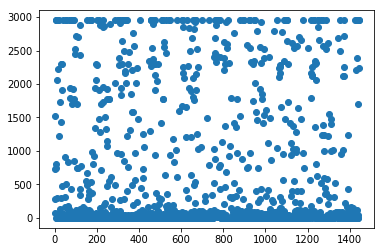

In [90]:
plt.scatter(range(len(df_vazios)),df_vazios)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22d0c6e7b8>]],
      dtype=object)

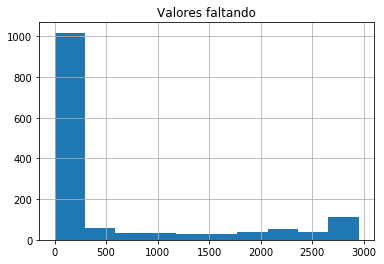

In [91]:
df_vazios.hist()

l_________________________l

##### Tratamento de dados

In [92]:
mm2 = mm.applymap(point2comma)

In [93]:
#quantos zeros tem no dataset?
(mm2[mm2==0].sum() > 0 ).sum()
#nenhum

0

Medidor
07266674      0.022358
07266923      0.246951
07267331      0.517954
07267651      0.096206
07311230      1.000000
07311230.1    1.000000
07329402      0.271680
07516510      0.252371
07516555      0.000000
07581189      0.000000
07582011      0.101626
07582021      1.000000
07582024      0.697493
07582343      0.000000
07646459      0.000000
07693908      0.752710
07723111      0.014228
07743510      0.015244
07743610      0.007114
07744717      0.413618
07767350      1.000000
07781656      0.000000
07789270      0.023713
07789368      0.584011
07795510      0.047087
07837091      0.000000
07853023      0.011518
08025105      0.006775
08025309      0.014228
08025539      0.487127
                ...   
09222784      0.051829
09222830      0.007114
09223657      0.000000
09223745      0.014228
09223949      0.000000
09224259      0.006775
09224273      0.000000
09224695      0.000000
09224891      0.012873
09225224      0.000000
09308398      0.000000
09308422      0.000000
093

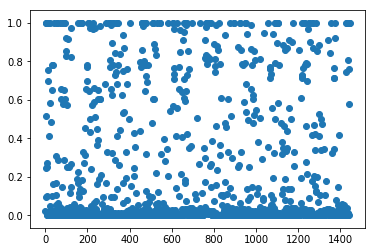

In [94]:
#quantos valores faltam?
print((mm2.isna().sum())/len(mm2))
plt.scatter(range(mm2.shape[1]), (mm2.isna().sum())/len(mm2))

In [109]:
OMM = '/home/ubuntu/data/data/maio_2019/setembro/mm/csv_proc/'

In [110]:
mm2.fillna(value=0,inplace=True)

In [111]:
mm2.shape

(2953, 2890)

##### Salvando dados

l__________________________________________________________________________________________________________________________________________________